(150, 3)


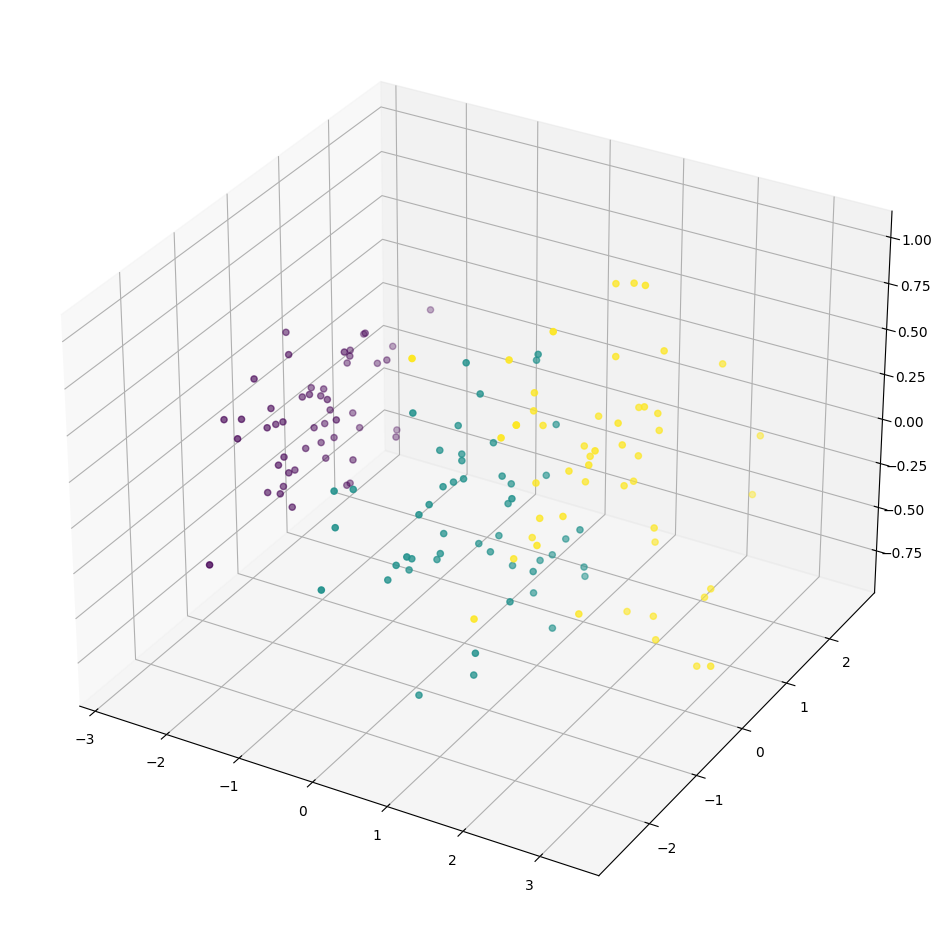

As for KMeans, the purity score for euclidean distance is 90.67%
As for KMeans, the purity score for manhattan distance is 90.0%
As for KMeans, the purity score for chebyshev distance is 82.67%
the highest score can be seen in chebyshev distance metrics. This is because chebyshev measures maximum difference over any of two data points' axis values


In [1]:
! pip install pyclustering
import pyclustering
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.utils.metric import type_metric
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.inspection import DecisionBoundaryDisplay
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


X, y = load_iris(return_X_y=True) # X: (150, 4)

def perform_PCA(data_norm):
    # perform PCA using sklearn PCA implementation
    pca = PCA(n_components=3, random_state=2)
    pca.fit(data_norm)
    reduced_X = pca.transform(data_norm)
    print(reduced_X.shape)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_X[:, 0], reduced_X[:, 1], reduced_X[:, 2],c=y)
    plt.show()
    return pca, reduced_X


# normalize our data via formula
data_norm = (X-X.mean(axis=0)) / X.std(axis=0)
pca, reduced_X = perform_PCA(data_norm)


distance_measures = {'euclidean': type_metric.EUCLIDEAN, 'manhattan': type_metric.MANHATTAN, 'chebyshev': type_metric.CHEBYSHEV}
optimum_n_clusters = 9
for measure, dist in distance_measures.items():
    initial_centers = random_center_initializer(reduced_X, optimum_n_clusters, random_state=5).initialize()
    instofKMeans = kmeans(reduced_X, initial_centers=initial_centers, metric=distance_metric(dist.value))
    instofKMeans.process()
    pyClusters = instofKMeans.get_clusters()
    # by default k-means returns representation CLUSTER_INDEX_LIST_SEPARATION
    pyEncoding = instofKMeans.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, reduced_X)
    # change representation from index list to label list
    pyLabels = pyEncoder.set_encoding(pyclustering.cluster.encoder.type_encoding.CLUSTER_INDEX_LABELING.value).get_clusters()
    score = purity_score(y, pyLabels)
    print(f"As for KMeans, the purity score for {measure} distance is {round(score*100, 2)}%")


